## **Tweet Emotion Recognition : Natural Language Processing with TensorFlow**

---
#### **Author : Pramod Gouda ; Guided by : Coursera Project Network**

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)



## Task 1: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     |████████████████████████████████| 1.7MB 8.4MB/s 
     |████████████████████████████████| 245kB 44.6MB/s 


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.5.0


## Task 2: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset = nlp.load_dataset('emotion')

Using custom data configuration default


Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = dataset['train']
val = dataset['validation']
test=dataset['test']

In [ ]:
def get_tweet(data) :
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels


In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

In [ ]:
tweets[10], labels[10]

('i feel like i have to make the suffering i m seeing mean something',
 'sadness')

In [ ]:
tweets[100], labels[100]

('i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months',
 'love')

In [ ]:
tweets[1000], labels[1000]

('i need to do the best i possibly can do and even when i get out at i feel too listless to study like right now',
 'sadness')

In [ ]:
tweets[5000], labels[5000]

('i liked the ending but i did feel like it was a little bit rushed', 'anger')

In [ ]:
tweets[10000], labels[10000]

('i often feel dissatisfied with such discussions partly because of the persistent everyone is beautiful nonsense but partly because they rarely go past the effects of advertising on body image',
 'anger')

In [ ]:
tweets[15000], labels[15000]

('i feel my hands being weaved with yours such delicate intimacy being shared by the hands of two people who shares so much secret for the world to be mystified',
 'love')

In [ ]:
tweets[15500], labels[15500]

('i dont know what i feel let me recount my emotional spectra all throughout those minutes of gfb finale',
 'sadness')

## Task 3: Tokenizer


1.   Tokenizing the tweets



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token= '<UNK')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

'i didnt feel humiliated'

In [ ]:
tokenizer.texts_to_sequences([tweets[10]])

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]

In [ ]:
tweets[10]

'i feel like i have to make the suffering i m seeing mean something'

## Task 4: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

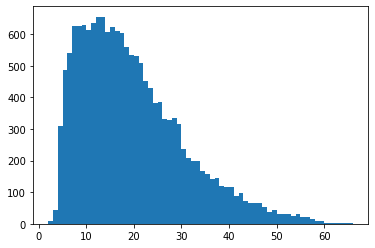

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins = len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating= 'post', padding='post', maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 5: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{'sadness', 'joy', 'surprise', 'fear', 'anger', 'love'}


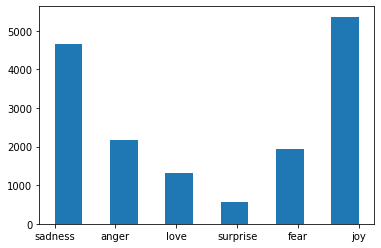

In [ ]:
plt.hist(labels, bins=11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k, v in class_to_index.items())

In [ ]:
class_to_index

{'anger': 4, 'fear': 3, 'joy': 1, 'love': 5, 'sadness': 0, 'surprise': 2}

In [ ]:
index_to_class

{0: 'sadness', 1: 'joy', 2: 'surprise', 3: 'fear', 4: 'anger', 5: 'love'}

In [ ]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[0])

0


## Task 6: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model= tf.keras.models.Sequential([
       tf.keras.layers.Embedding(10000, 16, input_length=maxlen), 
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
       tf.keras.layers.Dense(6, activation ='softmax')                      
])

model.compile(
    
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 7: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq, val_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
        ]
    )

Epoch 1/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0317 - accuracy: 0.9887 - val_loss: 0.4345 - val_accuracy: 0.8990
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0318 - accuracy: 0.9891 - val_loss: 0.4863 - val_accuracy: 0.8955
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0.4676 - val_accuracy: 0.8815


## Task 8: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

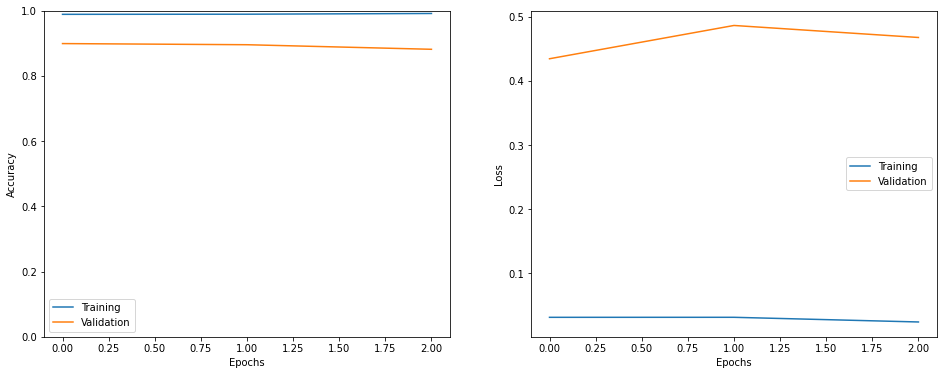

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
eval = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.8835


In [ ]:
i =random.randint(0, len(test_labels)-1)

print('Sentence : ', test_tweets[i])
print('Emotion :', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion :', pred_class)

Sentence :  i feel like i wouldnt have a longing if only we could have a baby and have that new experience together
Emotion : love
Predicted Emotion : love


In [ ]:
preds = model.predict_classes(test_seq)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


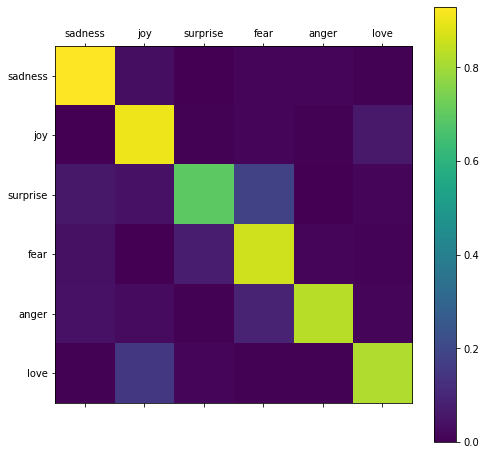

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes))